In [1]:
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import random
import os
import time

os.makedirs('./images/gan', exist_ok=True)

In [2]:
np.random.seed(1234)
torch.manual_seed(1234)
random.seed(1234)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
BATCH_SIZE  = 64
N_EPOCHS = 100
IMAGE_SIZE = 28 * 28
LATENT_DIM = 100
PRINT_EVERY = 5
N_SHOW = 5

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])

In [6]:
data = datasets.MNIST('.data',
                        train=True,
                        download=True,
                        transform=transforms,
                        )

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]


Extracting .data/MNIST/raw/train-images-idx3-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 499kB/s]


Extracting .data/MNIST/raw/train-labels-idx1-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]


Extracting .data/MNIST/raw/t10k-images-idx3-ubyte.gz to .data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.82MB/s]

Extracting .data/MNIST/raw/t10k-labels-idx1-ubyte.gz to .data/MNIST/raw



In [7]:
iterator = DataLoader(data,
                      batch_size=BATCH_SIZE,
                      shuffle=True,
                      drop_last=True,
                     )

In [8]:
class Generator(nn.Module):
    def __init__(self, latent_dim, image_size):
        super().__init__()

        self.main = nn.Sequential(

            nn.Linear(latent_dim, 256),
            nn.LeakyReLU(0.2),

            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),

            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),

            nn.Linear(1024, image_size),
            nn.Tanh(),

        )

    def forward(self, x):
        return self.main(x)


In [9]:
class Discriminator(nn.Module):
    def __init__(self, image_size):
        super().__init__()

        self.main = nn.Sequential(

            nn.Linear(image_size, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),

            nn.Linear(256, 1),
            nn.Sigmoid(),

        )

    def forward(self, x):
        return self.main(x).squeeze(1)

In [10]:
G = Generator(LATENT_DIM, IMAGE_SIZE).to(device)

In [11]:
D = Discriminator(IMAGE_SIZE).to(device)

In [12]:
criterion = nn.BCELoss()

In [13]:
G_optimizer = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
D_optimizer = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [14]:
#labels
real_labels = torch.ones(BATCH_SIZE,).to(device)
fake_labels = torch.zeros(BATCH_SIZE,).to(device)

In [15]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

| Epoch: 005 | D_error: 0.816 | G_error: 1.781 | Time: 0m 34s


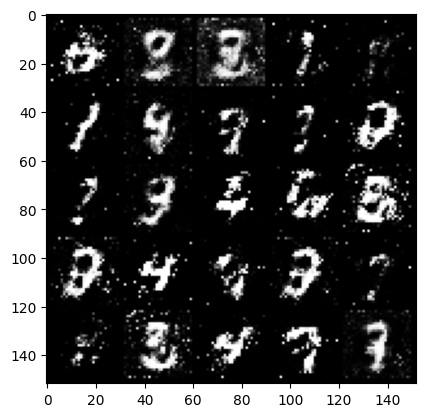

| Epoch: 010 | D_error: 0.909 | G_error: 1.334 | Time: 0m 36s


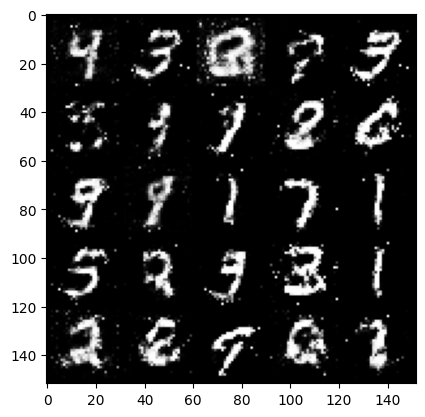

| Epoch: 015 | D_error: 1.107 | G_error: 1.060 | Time: 0m 35s


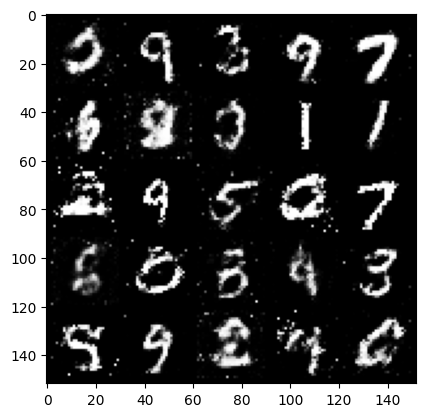

| Epoch: 020 | D_error: 1.102 | G_error: 1.182 | Time: 0m 35s


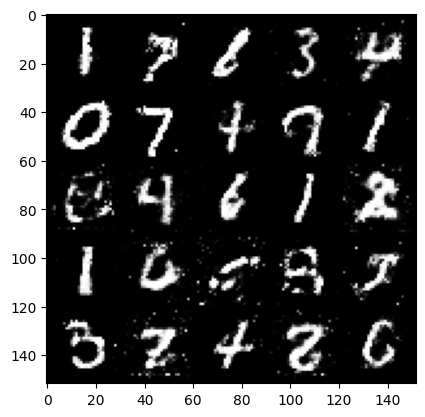

| Epoch: 025 | D_error: 1.154 | G_error: 1.257 | Time: 0m 36s


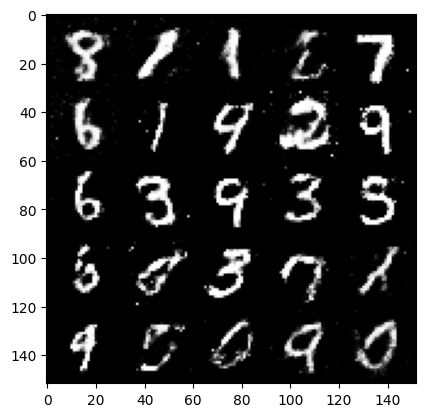

| Epoch: 030 | D_error: 1.155 | G_error: 0.932 | Time: 0m 36s


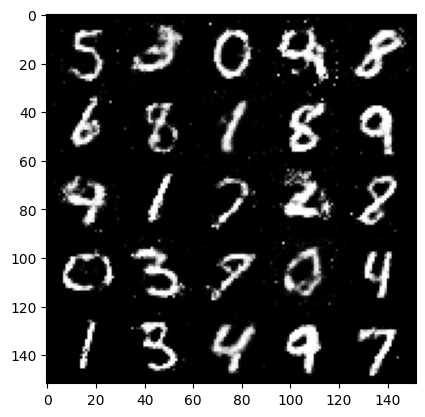

| Epoch: 035 | D_error: 1.178 | G_error: 0.827 | Time: 0m 36s


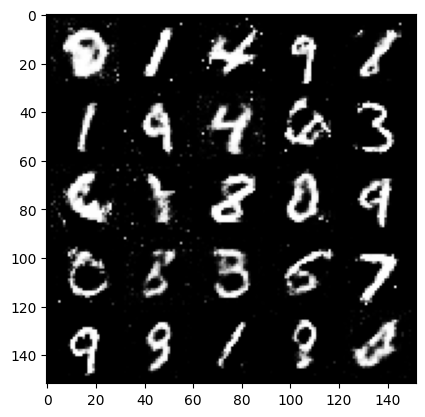

| Epoch: 040 | D_error: 1.263 | G_error: 1.060 | Time: 0m 36s


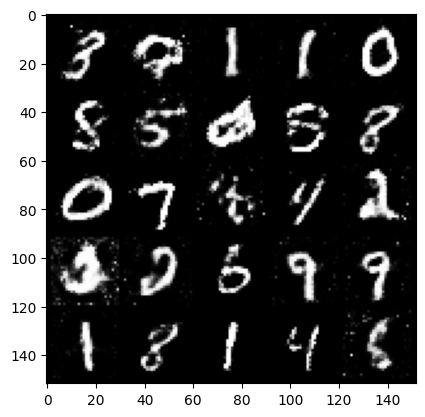

| Epoch: 045 | D_error: 1.039 | G_error: 1.214 | Time: 0m 35s


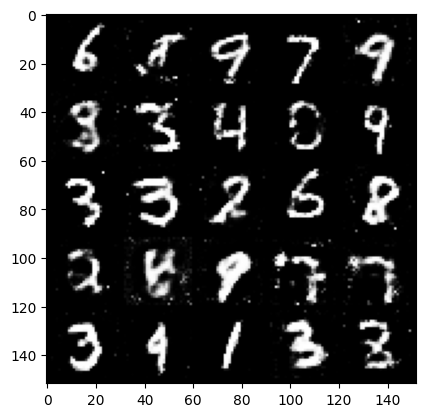

| Epoch: 050 | D_error: 1.185 | G_error: 1.092 | Time: 0m 35s


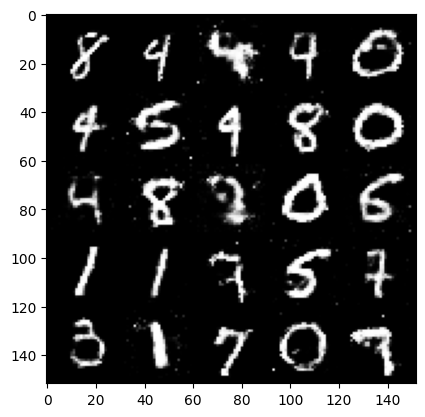

| Epoch: 055 | D_error: 1.194 | G_error: 0.899 | Time: 0m 36s


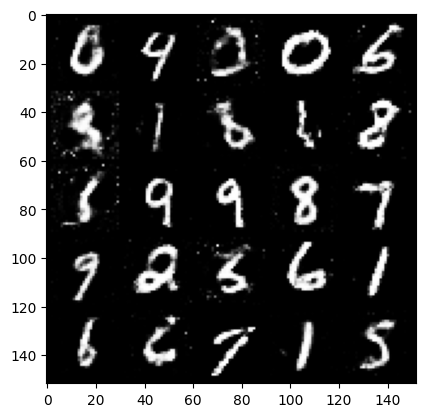

| Epoch: 060 | D_error: 1.187 | G_error: 1.253 | Time: 0m 35s


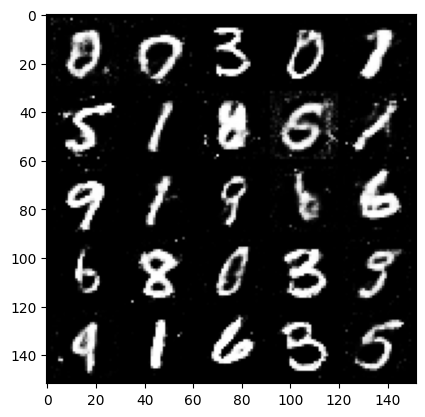

| Epoch: 065 | D_error: 1.180 | G_error: 0.942 | Time: 0m 35s


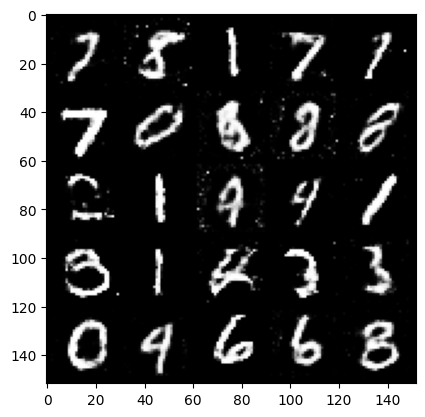

| Epoch: 070 | D_error: 1.209 | G_error: 1.078 | Time: 0m 36s


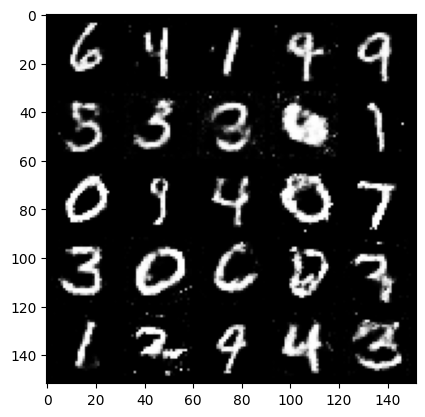

| Epoch: 075 | D_error: 1.235 | G_error: 1.159 | Time: 0m 36s


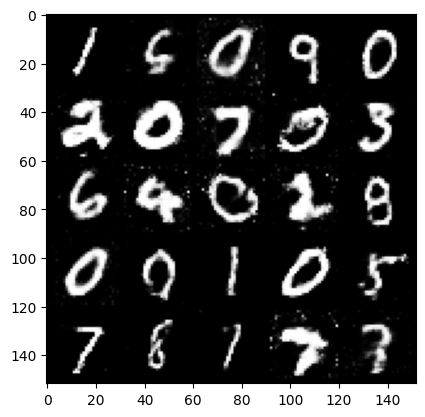

| Epoch: 080 | D_error: 1.157 | G_error: 0.806 | Time: 0m 35s


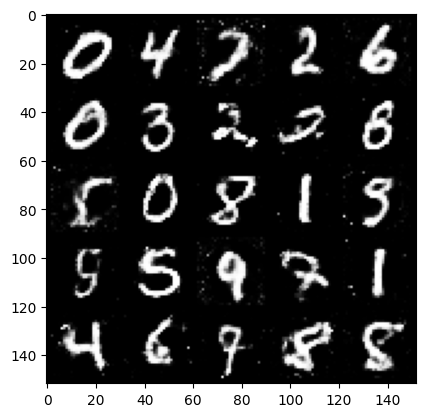

| Epoch: 085 | D_error: 1.156 | G_error: 1.189 | Time: 0m 35s


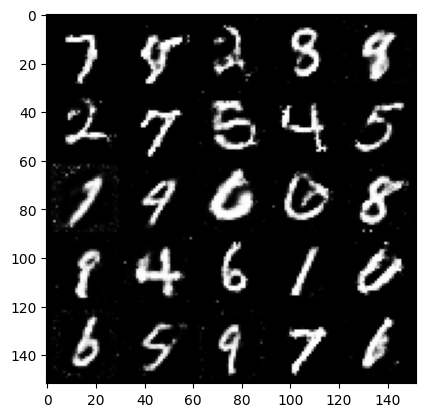

| Epoch: 090 | D_error: 1.147 | G_error: 0.995 | Time: 0m 36s


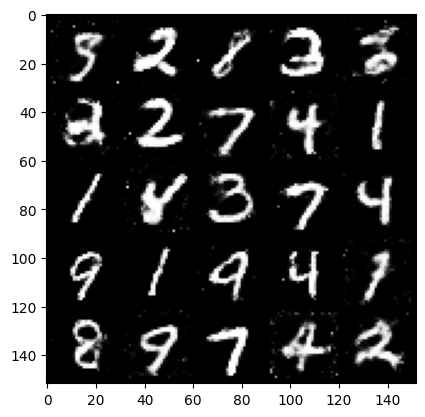

| Epoch: 095 | D_error: 1.143 | G_error: 1.189 | Time: 0m 35s


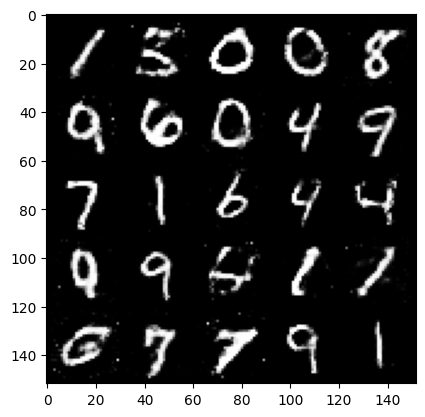

| Epoch: 100 | D_error: 1.114 | G_error: 1.059 | Time: 0m 35s


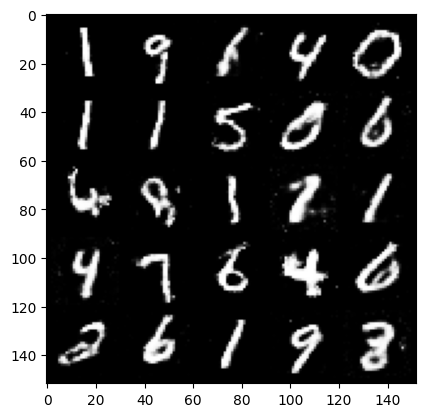

In [16]:
for epoch in range(1, N_EPOCHS+1):

    start_time = time.time()

    for _ in range(len(iterator)):

        #=====================#
        # TRAIN DISCRIMINATOR #
        #=====================#

        #zero discriminator gradients
        D.zero_grad()

        #get batch of real images
        x, _ = next(iter(iterator))

        #place images on GPU
        x = x.to(device)

        #flatten images
        x = x.view(-1, IMAGE_SIZE)

        #sample noise
        z = torch.randn(x.shape[0], LATENT_DIM).to(device)

        #generate images
        with torch.no_grad():
            generated_images = G(z)

        #put real images through discriminator
        pred_real = D(x)

        #how well does the discriminator detect real images?
        D_error_real = criterion(pred_real, real_labels)

        #put fake images through the discriminator
        #need to detach so don't backpropagate through generator
        pred_fake = D(generated_images.detach())

        #how well does the discriminator detect fake images?
        D_error_fake = criterion(pred_fake, fake_labels)

        #get discriminator error
        D_error = D_error_real + D_error_fake

        #backpropagate errors to get gradients
        D_error.backward()

        #use gradient to update discriminator parameters
        D_optimizer.step()

        #=================#
        # TRAIN GENERATOR #
        #=================#

        #zero generator gradients
        G.zero_grad()

        #get batch of real images
        x, _ = next(iter(iterator))

        #place images on GPU
        x = x.to(device)

        #flatten images
        x = x.view(-1, IMAGE_SIZE)

        #sample noise
        z = torch.randn(x.shape[0], LATENT_DIM).to(device)

        #generate images
        generated_images = G(z)

        #put fake images through the discriminator
        pred_fake = D(generated_images)

        #how well does the generator fool the discriminator?
        G_error = criterion(pred_fake, real_labels)

        #backpropagate errors to get gradients
        G_error.backward()

        #use gradient to update generator parameters
        G_optimizer.step()

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if (epoch % PRINT_EVERY) == 0:

        #sample noise
        z = torch.randn(N_SHOW*N_SHOW, LATENT_DIM).to(device)

        #generate images
        with torch.no_grad():
            generated_images = G(z)

        #reshape to (batch, channel, height, width)
        generated_images = generated_images.view(-1, 1, 28, 28)

        print(f'| Epoch: {epoch:03} | D_error: {D_error.item():.03f} | G_error: {G_error.item():.03f} | Time: {epoch_mins}m {epoch_secs}s')

        #save N_SHOW*N_SHOW images
        torchvision.utils.save_image(generated_images,
                                     f'images/gan/epoch{epoch:03}.png',
                                     nrow=N_SHOW,
                                     normalize=True)

        #display images
        img = plt.imread(f'images/gan/epoch{epoch:03}.png')
        plt.imshow(img)
        plt.show()